# Deep Learning and Neural Networks

This last course topic will be an introduction to **deep learning** and **neural networks**.

Much like most other topics in this course, these topics are often the basis of full semester courses and textbooks on their own.

The purpose of this lecture today will be to make you familiar with the basic concepts surrounding deep learning and neural networks. That way - if you want to look into them more on your own or in future research projects, you will be well equipt to make progress on your own.

## Resources

Becuase your textbook doesn't cover this topic, I've made use of several on-line resources:

- UC Business Analytics: http://uc-r.github.io/predictive#deep-learning

- R Studio Blog: https://blog.rstudio.com/2018/09/12/getting-started-with-deep-learning-in-r/

- Personal Blog of Jun Ma: http://junma5.weebly.com/data-blog/build-your-own-neural-network-classifier-in-r

# (1) Introduction and Basics

Neural Networks (or Artificial Neural Networks = ANN) are a type of algorithm that attempts to fit a complex function to data by *fitting patterns*.

They were inspired by the way brains - with many individual neurons - process information. 

ANNs - like actual brains - are composed of individual **neurons**.

Each neuron is very simple and makes only a single decision: 

*Do I fire (output positive value) or not (output 0).*

Amazingly, when many neurons are connected - usually in layers - essentially any pattern/function in data can be fit. (i.e., learned....)



### (1.1) **Biological Neurons**

Since the neurons in neural networks take as inspiration the biological neurons. Let's take a second to look at what a biological neuron looks like.

![Biological Neurons](https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png)
Figure 1: Biologic Neuron–Source: Bruce Blaus Wikipedia

The biological reality is very complicated. But there are only three parts to pay attention to:

**Dendrite**, **Cell body**, and the **Axon** (with the Synaptic terminals).

Information (in the form of neuroelectric signals = let's just call this electricity) flows through the neuron:

**Input**: Dendrites accept the input from neighboring neurons

**Processing**: Within the cell body the input signals are analyzed, if a sufficient amount of electricity enters the neurons the decision is made to output a response (positive) signal.

**Output**: The output signal is transmitted to other neurons through the axon via the synaptic terminals.

***Key Properties***

1) The neuron only generates a signal with enough input (all or nothing)

2) Neurons receive inputs from many adjacent neurons (inputs) and transmit signals to many adjacent neurons (outputs)

3) Each neuron has it's own threshold for activation (synaptic weight.)

### (1.2) Artificial Neurons

The artificial neuron, takes as inspiration the biological neuron. 

![ArtificialNeuron](https://upload.wikimedia.org/wikipedia/commons/6/60/ArtificialNeuronModel_english.png)
Figure 2: Artifical Neuron–Source: Chrislb Wikipedia


- **Inputs** (Left): 

    These **Inputs** correspond to the **Dendrites** in the biological neurons.
    
    Signals that come in from either direct inputs or other neighboring neurons.
    
    
- **Transfer function, net input, and activation function** (Middle):

    Together the transfer function, net input and activation function correspond to the cell body.
    
    The **Transfer Function** combines the input signals according to their weights.
    
    The **Net Input** is the single value considered by the neuron.
    
    The **Activation Function** simply maps the *net input* to the *output*
    
    
- **Activation** (Right):

    Corresponds to the axon and synaptic terminals.
    
    This send the output signal to other neighboring neurons.

## (1.3) Neural Networks

As mentioned above, a single artificial neuron doesn't do much. (Except generate a single output signal.)

The key is to connect the neurons together, usually with multiple layers.

![Single Layer](https://upload.wikimedia.org/wikipedia/commons/b/be/Single_layer_ann.svg)
**Figure 3: Single Layer Network** (Inputs on Bottom) with the artificial neurons as circles (Middle) and their output layer (Y's on top).

We will be more specific later, but let's talk about some of the coefficients/constants: $w_{i,j}, x_i$ and $b_i$.

- The $w_{i,j}$ act as weights which multiply the signal $x_i$ to the node $j$. 

- We can model the connectivity by assigning $w_{i,j} = 0$ when input $i$ is not connected to node $j$.

- The $b_i$'s act as a *basal level of signal* to node $i$. (Also called the *bias* of the neuron $i$.) 

![Two Layer](https://upload.wikimedia.org/wikipedia/commons/7/7f/Two_layer_ann.svg)
**Figure 4: Two Layer Network** (Inputs on Bottom) with two layers of the artificial neurons as circles (Middle). 
- The original signal $\vec{x}$ is propagated to $\vec{z}$ in the first layer (Hidden).
- The final layer (Output) propagates the $\vec{z}$ to the final output $\vec{y}$.

Many more general topologies are possible, and in general we distinguish between three types of artificial neurons in a artificial neural network (ANN):

- Input Layer

- Hidden Layer

- Output Layer

![ANNTopology](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)

## (1.4) Activation Function

With the network topology in mind, the last step we have is to define the activation function. 

(We will then of course explain how we will fit the ANN to data.)

Each node (aka neuron) $j$ decided independently what to output. The quantity that is output by the node is determined by its inputs and the choice of activation function: $\phi()$.

Consider a network with weights $w_{i,j}$ and input signal $\vec{x} = \left(x_1, x_2, \dots, x_p \right)$. The output from node $j$ is $o_j$ defined as follows.

\begin{equation}
o_j = \phi\left(b_j + \sum_{i = 1}^{p} w_{i,j} x_i \right).
\end{equation}

There are *many* choices of activation functions. Generally speaking we want a function that:

- Is increasing with it's input. (Higher input signal gives higher output signal).

- Is *smooth* (nice for mathematics). 

![ActivationFunctions](http://uc-r.github.io/public/images/analytics/deep_learning/activations-1.png)

While the *binary step* function most closely mirrors (at least what I understand) from biological neurons, it is not very smooth.

A common and popular choice is ReLU *the rectified linear unit*. While this function has a single discontiniuty in the first derivative (at 0 input), we can approximate it by the softplus function:

- ReLU function:
\begin{equation}
f(x) = \max\left(0, x\right)
\end{equation}

- SoftPlus function:
\begin{equation}
g(x)= \log\left( 1 + \exp{x}\right).
\end{equation}

![SoftPlus](https://upload.wikimedia.org/wikipedia/commons/6/6c/Rectifier_and_softplus_functions.svg)

These two functions look very similar, AND the softplus is smooth and nice :)

## (1.5) How ANNs "Learn"

The context we are considering *learning* is for an ANN to take in data and predict a desired output by finding parameter values: $w_{i,j}$ and $b_i$ that match the desired output.

Let's again return to our context of $n$ samples of $p$ features: $\vec{x}_i$ with an associated output of interest $y$.

Let's consider all the inputs to be in the $n \times p$ matrix $X$ and all outputs to be the $n$-dimensional vector $\vec{y}$.

Our goal is to develop an ANN so that:
\begin{equation}
\text{ANN}(X,W,\vec{b}) \approx  \vec{y}
\end{equation}
for appropriate choice of weights $W$ and biases $\vec{b}$ 

As we have done throughout the course, we want to minimize the error between the predictions $\text{ANN}(X,W,\vec{b}) = \vec{\hat{y}}$ and the true output $\vec{y}$. Let's consider the least-squared-error:

\begin{equation}
E(W,\vec{b}) = \frac{1}{2} \| \vec{y} - \vec{\hat{y}} \|.
\end{equation}

### How do we solve this minimization problem?!?!

We go back to calculus/gradient-descent methods.

- *Initial Step:* Choose a random initial choice of weights and biases.

- Repeat the next two steps until a desired convergence criteria is reached.

    - *Forward Pass*: Compute the partial derivatives of $E(W,\vec{b})$ and calculate the gradient.

    - *Back Propagation*: Change your parameters by moving a *small step* in the direction of greatest decrease in the error.

## (1.6)  Common Concerns/Issues with ANNs

For more information: 
https://towardsdatascience.com/hype-disadvantages-of-neural-networks-6af04904ba5b

### Pros:

- Able to fit essentially any function. (i.e., we do not need to assume any type of relationship between predictors and output.)

- Highly generalizable! By changing the topology/activation functions you can improve performance on different types of data sets. 

- Neglecting computational costs, ANNs typically outperform **ANY OTHER** statistical/machine learning method.

### Cons:

- Black box model! Impossible to interpret the direct relationship between parameters and model.

![BlackBox](https://cdn-images-1.medium.com/max/1600/0*YHaXGNXsNn56KZPN.jpg)

- Converged weights/biases are typically local minimia. So while these models will give you high predictability they do not aid in intreprebility.

    For example, if your algorithm is deciding whether to give someone a loan (or not) you won't have a good way to tell them how to improve their chances in the future. 

- Neural networks typically need *a lot more data* than traditional machine learning methods. 

- Computationally less efficient than other methods. But with improving CPU power, they are becoming more competitive.

# (2) Examples of Neural Neworks

### (2.1) Spiral non linearly separable data set

In [20]:
N <- 200 # number of points per class
D <- 2 # dimensionality
K <- 4 # number of classes
X <- data.frame() # data matrix (each row = single example)
y <- data.frame() # class labels

set.seed(308)
 
for (j in (1:K)){
  r <- seq(0.05,1,length.out = N) # radius
  t <- seq((j-1)*4.7,j*4.7, length.out = N) + rnorm(N, sd = 0.3) # theta
  Xtemp <- data.frame(x =r*sin(t) , y = r*cos(t)) 
  ytemp <- data.frame(matrix(j, N, 1))
  X <- rbind(X, Xtemp)
  y <- rbind(y, ytemp)
}
 
data <- cbind(X,y)
colnames(data) <- c(colnames(X), 'label')

In [21]:
head(data)

x,y,label
0.002477423,0.04993859,1
-0.007467571,0.05426244,1
-0.025218771,0.05394392,1
0.028151496,0.05783392,1
-0.011853226,0.06807118,1
-0.014849427,0.07236142,1


X, y are 800 by 2 and 800 by 1 data frames respectively, and they are created in a way such that a linear classifier cannot separate them. Since the data is 2D, we can easily visualize it on a plot. They are roughly evenly spaced and indeed a line is not a good decision boundary.

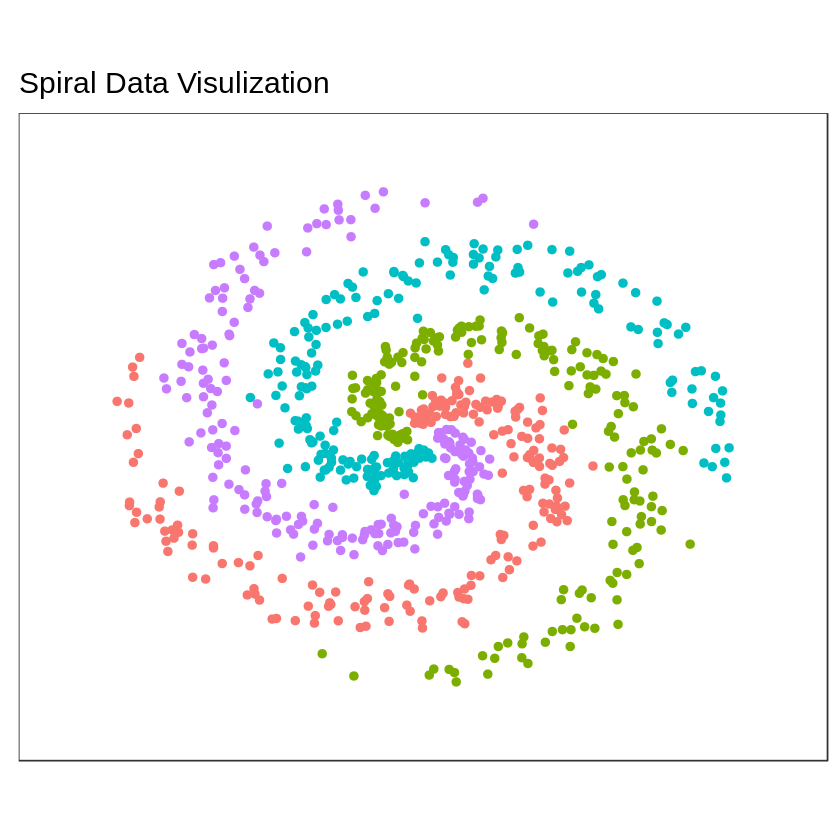

In [23]:
# install.packages('ggplot2')
library(ggplot2)
#Determine x and y ranges range for plotting
x_min <- min(X[,1])-0.2; x_max <- max(X[,1])+0.2
y_min <- min(X[,2])-0.2; y_max <- max(X[,2])+0.2
 
# lets visualize the data:
ggplot(data) + geom_point(aes(x=x, y=y, 
    color = as.character(label)), size = 2) + 
    theme_bw(base_size = 15) +
    xlim(x_min, x_max) + ylim(y_min, y_max) +
    ggtitle('Spiral Data Visulization') +
    coord_fixed(ratio = 0.8) +
    theme(axis.ticks=element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(), 
          axis.text=element_blank(), 
          axis.title=element_blank(), 
          legend.position = 'none')

Great - so we have a really complicated set of data that most of our regression examples would have trouble with. 

**Note:** I'm curious what a decision tree/random forest would do?

### Neural Network Construction:

Now, let’s construct an ANN with 2 layers. But before that, we need to convert X into a matrix (for matrix operation later on). 

For labels in y, a new matrix Y (800 by 4) is created such that for each example (each row in Y), the entry with index==label is 1 (and 0 otherwise). 

In [24]:
N*K

[1] 800

In [28]:
#Convert X from a dataframe to a matrix. 
X <- as.matrix(X)

#Convert Y to a matrix: N x 4 
Y <- matrix(0, N*K, K)

# Y is the correct label for the class.
dim(Y)
for (i in 1:(N*K)){
  Y[i, y[i,]] <- 1
}

[1] 800   4

In [36]:
dim(X)
dim(Y)

[1] 800   2

[1] 800   4

We will now build an ANN with two layers (i.e., a hidden and an output layer) by writing a function *nnet* that 

- **Input** two matrices: X and Y 

- **Output** A list of 4 parameter combinations. The weights and biases for each layer:

       - Hidden Layer: W, b
       - Output Layer: W2, b2

- **Other Choices**

    - Activation Function: ReLU
    
    - Number of Nodes in Hidden Layer: h 
    
        We can play around with any number of hidden nodes. In principle, we will allow the model to decide which inputs are connected to which hidden layers.
    
    - Number of Nodes in Output Layer: K = 4 (one node for each category.)
    
        Each output node will give a score between $0$ and $+\infty$ for each category: $s_1, s_2, s_3, s_4$.
        
        We will convert these into probabilities for each category ($p_i$) as follows:
        
        $$p_i = \frac{e^{s_1}}{\sum_{i = 1}^{4} e^{s_i}}.$$
        
         Note: This should feel very similar to logistic regression!
    
    - Step Size/Learning Rate:  How much you move in the direction of the gradient.
    
    - Regularization Strength: 
    
        Much like in Lasso/Ridge regression, we are going to penalize our error by the norm of the parameters. (i.e., we favor models that reduce the total number of non-zero parameters.)


In [37]:
# %*% dot product, * element wise product
#Note when we set the values = 
# in the function heading these become default parameter values
nnet <- function(X, Y, step_size = 0.5, reg = 0.001, 
                 h = 10, niteration){
  # get dim of input
  N <- nrow(X) # number of examples
  K <- ncol(Y) # number of classes
  D <- ncol(X) # dimensionality
    
  print(paste(N, K, D))
 
  # initialize parameters randomly
  W <- 0.01 * matrix(rnorm(D*h), nrow = D)  #Weights hidden layer
  b <- matrix(0, nrow = 1, ncol = h)        #Biases hidden layer
  W2 <- 0.01 * matrix(rnorm(h*K), nrow = h) #Weights output layer
  b2 <- matrix(0, nrow = 1, ncol = K)       #Biases output layer
 
  # gradient descent loop to update weight and bias
  for (i in 0:niteration){
    # hidden layer, ReLU activation
    hidden_layer <- pmax(0, X%*% W + matrix(rep(b,N), nrow = N, byrow = T))
    hidden_layer <- matrix(hidden_layer, nrow = N)

    # output layer, class score 
    scores <- hidden_layer%*%W2 + matrix(rep(b2,N), nrow = N, byrow = T)
 
    # compute and normalize class probabilities
    exp_scores <- exp(scores)
    probs <- exp_scores / rowSums(exp_scores)
 
    # compute the loss: sofmax and regularization
    corect_logprobs <- -log(probs)
    data_loss <- sum(corect_logprobs*Y)/N
    reg_loss <- 0.5*reg*sum(W*W) + 0.5*reg*sum(W2*W2)
    loss <- data_loss + reg_loss
    # check progress
#     if (i%%1 == 500 | i == niteration)
      print(paste("iteration", i,': loss', loss))
 
    # compute the gradient on scores
    dscores <- probs-Y
    dscores <- dscores/N
 
    # backpropate the gradient to the parameters
    dW2 <- t(hidden_layer)%*%dscores
    db2 <- colSums(dscores)
    # next backprop into hidden layer
    dhidden <- dscores%*%t(W2)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] <- 0
    # finally into W,b
    dW <- t(X)%*%dhidden
    db <- colSums(dhidden)
 
    # add regularization gradient contribution
    dW2 <- dW2 + reg *W2
    dW <- dW + reg *W
 
    # update parameter 
    W <- W-step_size*dW
    b <- b-step_size*db
    W2 <- W2-step_size*dW2
    b2 <- b2-step_size*db2
  }
  return(list(W, b, W2, b2))
}

We then need a function to take the final set of parameters and to make an actual prediction given the data $X$ and the parameters: W,b,W2,b2.

We will classify the input as the output category with the highest probability.

In [31]:
nnetPred <- function(X, para = list()){
  W <- para[[1]]
  b <- para[[2]]
  W2 <- para[[3]]
  b2 <- para[[4]]
 
  N <- nrow(X)
  hidden_layer <- pmax(0, X%*% W + matrix(rep(b,N), nrow = N, byrow = T)) 
  hidden_layer <- matrix(hidden_layer, nrow = N)
  scores <- hidden_layer%*%W2 + matrix(rep(b2,N), nrow = N, byrow = T) 
  predicted_class <- apply(scores, 1, which.max)
 
  return(predicted_class)  
}
 

Nothing left to do but to run the model!

In what follows below we have:

- Step_Size = 0.4;

- Reg = 0.0002

- h = 50

- maxiterations = 6000

In [42]:
dim(X)
dim(Y)

[1] 800   2

[1] 800   4

In [38]:
nnet.model <- nnet(X, Y, step_size = 0.4,reg = 0.0002, h=50, niteration = 50)

[1] "800 4 2"
[1] "iteration 0 : loss 1.38625559846493"
[1] "iteration 1 : loss 1.38623371518786"
[1] "iteration 2 : loss 1.38621143954247"
[1] "iteration 3 : loss 1.38618822289173"
[1] "iteration 4 : loss 1.38616416815647"
[1] "iteration 5 : loss 1.38613948313448"
[1] "iteration 6 : loss 1.38611389906667"
[1] "iteration 7 : loss 1.38608660411672"
[1] "iteration 8 : loss 1.38605797296806"
[1] "iteration 9 : loss 1.38602800989887"
[1] "iteration 10 : loss 1.38599741388456"
[1] "iteration 11 : loss 1.38596654085265"
[1] "iteration 12 : loss 1.38593526657573"
[1] "iteration 13 : loss 1.38590307176783"
[1] "iteration 14 : loss 1.38586980322987"
[1] "iteration 15 : loss 1.38583524904888"
[1] "iteration 16 : loss 1.38579891139208"
[1] "iteration 17 : loss 1.38576074273589"
[1] "iteration 18 : loss 1.38572071216548"
[1] "iteration 19 : loss 1.38567874364656"
[1] "iteration 20 : loss 1.38563472432065"
[1] "iteration 21 : loss 1.38558827370144"
[1] "iteration 22 : loss 1.38553934062956"
[1] "it

In [45]:
nnet.model

[[1]]
          [,1]        [,2]         [,3]         [,4]       [,5]        [,6]
x -0.003379927 -0.03985020 -0.003320356 -0.017785817 0.07398200 -0.01227868
y  0.024028535 -0.02268973 -0.011147528  0.009808776 0.01345561  0.01608962
          [,7]       [,8]        [,9]       [,10]       [,11]       [,12]
x -0.007031356 0.03641509 -0.01623870 0.002370801 0.008105026  0.02378944
y  0.015266579 0.02110476  0.03219836 0.005347697 0.028492482 -0.02080953
         [,13]        [,14]       [,15]       [,16]       [,17]       [,18]
x -0.011160092 -0.001796436 -0.02070413 -0.01962908 -0.02028826 0.073720688
y -0.007104501  0.033111721 -0.01460198 -0.01503318 -0.00201494 0.008043572
        [,19]       [,20]        [,21]       [,22]         [,23]        [,24]
x 0.009600847 -0.01352798  0.009633549 0.002098033 -0.0111970269  0.004589929
y 0.000185632 -0.01655358 -0.017326121 0.015733469  0.0006873664 -0.023589462
        [,25]       [,26]      [,27]       [,28]        [,29]      [,30]
x 0.002962417 0.008506586 0.01233809 -0.03963949  0.048027139 0.01707819
y 0.005108047 0.033294384 0.01077317  0.01561866 -0.008248157 0.02177820
        [,31]        [,32]        [,33]       [,34]       [,35]      [,36]
x -0.02554289 -0.009753074 -0.018372354 -0.01986216 -0.01881198 0.02551198
y -0.01101670 -0.017499312 -0.006072406  0.01013002 -0.03308259 0.02466548
        [,37]        [,38]       [,39]       [,40]       [,41]        [,42]
x -0.02827509 -0.018988222  0.02277788  0.01159616  0.01943544 -0.002343473
y -0.01613687  0.002163818 -0.01915452 -0.04696790 -0.04798976 -0.004644738
         [,43]        [,44]       [,45]        [,46]       [,47]        [,48]
x  0.019511800 -0.026238357 -0.03985813  0.029657866 -0.03749619 -0.008526618
y -0.003864642 -0.001947508  0.01239488 -0.009002855  0.01695991  0.012777362
        [,49]        [,50]
x 0.010311720 -0.001232986
y 0.001147338  0.017192708

[[2]]
            [,1]       [,2]         [,3]        [,4]       [,5]        [,6]
[1,] 0.003669316 0.02645053 -0.009693027 0.004246008 0.04671102 0.008563081
           [,7]      [,8]       [,9]      [,10]      [,11]      [,12]
[1,] 0.00939909 0.0244403 0.01986467 0.00155347 0.01810235 0.01958723
            [,13]     [,14]      [,15]       [,16]      [,17]      [,18]
[1,] -0.003473246 0.0192394 0.00261942 0.003369918 0.01205508 0.04472147
           [,19]      [,20]      [,21]         [,22]       [,23]       [,24]
[1,] 0.002875196 0.01144481 0.01128225 -0.0009565077 0.004522827 0.005500313
            [,25]       [,26]         [,27]      [,28]      [,29]      [,30]
[1,] -0.003860202 0.002086931 -0.0002352821 0.02353176 0.03110885 0.01554679
          [,31]        [,32]      [,33]       [,34]      [,35]      [,36]
[1,] 0.01655122 -0.006824273 0.00151053 0.003383565 0.02144903 0.01961545
           [,37]       [,38]      [,39]     [,40]      [,41]        [,42]
[1,] 0.005254938 0.004408749 0.01693118 0.0278287 0.03058083 -0.004529403
           [,43]      [,44]      [,45]      [,46]       [,47]       [,48]
[1,] 0.001702415 0.01536622 0.02460943 0.01620402 0.004913133 0.002998882
            [,49]      [,50]
[1,] -0.002942932 0.00857728

[[3]]
              [,1]          [,2]          [,3]          [,4]
 [1,] -0.013220171 -0.0113908305  0.0178091972  7.760963e-03
 [2,]  0.007174193 -0.0320228736 -0.0301457591  2.385381e-02
 [3,] -0.013919481 -0.0019214907  0.0120038804 -1.017787e-02
 [4,] -0.005909400  0.0034651793  0.0030961374  1.830973e-02
 [5,] -0.023685179  0.0749874882  0.0107392712 -5.156174e-02
 [6,] -0.016661895 -0.0087693165  0.0048993171 -2.184161e-03
 [7,] -0.008824636 -0.0100574599  0.0154151389  6.462380e-03
 [8,] -0.011105757  0.0270071491  0.0266045266 -2.771242e-02
 [9,] -0.030052135 -0.0096885559  0.0200499312  1.302286e-02
[10,] -0.004605728  0.0070251856 -0.0050344564 -4.236326e-03
[11,] -0.026684953  0.0137876058  0.0158962829 -1.103094e-03
[12,]  0.018150642  0.0157074461 -0.0124936995 -2.407140e-02
[13,]  0.023140639 -0.0066226818  0.0021

In [43]:
predicted_class <- nnetPred(X, nnet.model)

In [35]:
print(paste('training accuracy:',mean(predicted_class == (y))))

[1] "training accuracy: 0.96375"


Nice - we have a training accuracy of 96%! This looks pretty good for a dataset that is as complicated as this one.

Let's take a look at which points were mis-classified. We will give them a new category and plot them as a different color.

In [18]:
newData = data;
newData$predictedLabel<-predicted_class
newData <- within(newData, label[predictedLabel != label]<- 6)

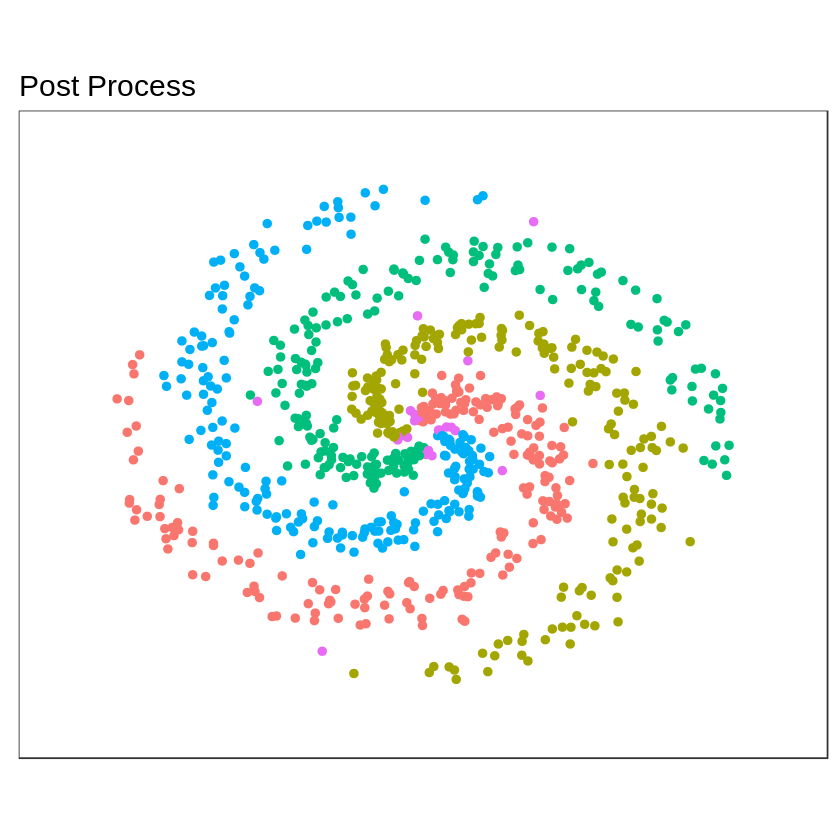

In [19]:
# lets visualize the data:
ggplot(newData) + geom_point(aes(x=x, y=y, 
    color = as.character(label)), size = 2) + 
    theme_bw(base_size = 15) +
    xlim(x_min, x_max) + ylim(y_min, y_max) +
    ggtitle('Post Process') +
    coord_fixed(ratio = 0.8) +
    theme(axis.ticks=element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(), 
          axis.text=element_blank(), 
          axis.title=element_blank(), 
          legend.position = 'none')

The points that were mis-categoriezed are very close to the boundary between the two regions. It's probable that their output probabilties were *close* to 50% (i.e., not sure which one of two categories were correct.)

If we increase the training data size - we can get even better performance because we will be able to refine the decision boundaries better.

We have very complicated decision boundaries as are shown in this code where many samples were generated and the categories plotted:

![DecisionBoundaries](http://junma5.weebly.com/uploads/4/6/5/1/46519751/1241933_orig.png)

### (2.2) MNIST Data Set

This is now one of the most classical examples in neural network, namely we need to take a look at the classification of hand drawn digits.

Like our previous case, this is a classification problem because we want the output to be one of the digits 0 to 9.

(Note: There's another MNIST like example that classifies pictures of clothing according to their types: https://tensorflow.rstudio.com/keras/articles/tutorial_basic_classification.html)

We will use a similar neural network approach.

First let's read the data. (Because the dataset is HUGE - I'll only work with a subset of the data!)

In [ ]:
displayDigit <- function(X){
  m <- matrix(unlist(X),nrow = 28,byrow = T)
  m <- t(apply(m, 2, rev))
  image(m,col=grey.colors(255))
}
 
train <- read.csv("mnist_train.csv", 
        header = TRUE, stringsAsFactors = F,nrows=1000)
displayDigit(train[18,-1])

Now, let’s standardize the data by removing near zero variance columns and scaling by max(X). 

We will also split into testing and training data sets for cross-validation.

Once again, we need to creat a Y matrix with dimension N by K. This time the non-zero index in each row is offset by 1: label 0 will have entry 1 at index 1, label 1 will have entry 1 at index 2, and so on. 

In the end, we need to convert it back. (Another way is put 0 at index 10 and no offset for the rest labels.) 

In [ ]:
#Note: Could not get this to work with the code. Let's just keep moving on.
#Right now we will have a much higher dimensional data set than we should

#############################################################################################################
# Authors:
#   This function was borrowed from the package caret nzv.R with some enhancements made by
#   Florian Rohart, The University of Queensland, The University of Queensland Diamantina Institute, Translational Research Institute, Brisbane, QLD
#   Benoit Gautier, The University of Queensland, The University of Queensland Diamantina Institute, Translational Research Institute, Brisbane, QLD
#
# created: 2014
# last modified: 12-04-2016
#
# Copyright (C) 2014
#
# This program is free software; you can redistribute it and/or
# modify it under the terms of the GNU General Public License
# as published by the Free Software Foundation; either version 2
# of the License, or (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program; if not, write to the Free Software
# Foundation, Inc., 59 Temple Place - Suite 330, Boston, MA  02111-1307, USA.
#############################################################################################################


# --------------------------------------
# nearZeroVar
# --------------------------------------

nearZeroVar = function (x, freqCut = 95/5, uniqueCut = 10)
{
    
    if (is.vector(x))
    x = matrix(x, ncol = 1)
    
    freqRatio = apply(x, 2, function(data)
        {
            data = na.omit(data)
        
            if (length(unique(data)) == length(data))
            { # No duplicate
                return(1)
            } else if (length(unique(data)) == 1) { # Same value
                return(0)
            } else {
                t = table(data)
                return(max(t, na.rm = TRUE)/max(t[-which.max(t)], na.rm = TRUE))
            }
        })
    
    lunique = apply(x, 2, function(data) length(unique(data[!is.na(data)])))
    
    percentUnique = 100 * lunique/nrow(x)
    zeroVar = (lunique == 1) | apply(x, 2, function(data) all(is.na(data)))
    
    out = list()
    out$Position = which((freqRatio > freqCut & percentUnique <= uniqueCut) | zeroVar)
    names(out$Position) = NULL
    out$Metrics = data.frame(freqRatio = freqRatio, percentUnique = percentUnique)
    out$Metrics = out$Metrics[out$Position, ]
    return(out)
}


In [ ]:
NTotal = nrow(train)
p = 0.7;
numTrain <- floor(NTotal*p);
trainSet <- sample(1:NTotal, numTrain, replace = FALSE);

training <- train[trainSet, ];
CV       <- train[-trainSet,];

#Training data
X <- as.matrix(training[,-1]) #data w/o class labels
N <- nrow(X)                  
y <- training[,1] #class labels

K <- length(unique(y)) # number of classes
X.proc <- X/max(X) # scale
D <- ncol(X.proc) # dimensionality
 
Xcv <- as.matrix(CV[, -1]) # data matrix (each row = single example)
ycv <- CV[, 1] # class labels
Xcv.proc <- Xcv/max(X) # scale CV data
 
Y <- matrix(0, N, K)
 
for (i in 1:N){
  Y[i, y[i]+1] <- 1
}


We can run this data with our previously written neural network code:

In [ ]:
nnet.mnist <- nnet(X.proc, Y, step_size = 0.3, 
                   reg = 0.0001, niteration = 1000)

In [ ]:
predicted_class <- nnetPred(X.proc, nnet.mnist)
print(paste('training set accuracy:',
            mean(predicted_class == (y+1))))

So it's saying we have perfect accuracy! (And this was such a small sample too!)

Let's take a look at a typical prediction.

In [ ]:
Xtest <- X[sample(1:nrow(X), 1), ]
Xtest.proc <- as.matrix(Xtest, nrow = 1)
predicted_test <- nnetPred(t(Xtest.proc), nnet.mnist)
print(paste('The predicted digit is:',predicted_test-1 ))
displayDigit(Xtest)

Nice - so we should have higher accuracy on our test data set than our CV data set. Let's look at that.

In [ ]:
predicted_class <- nnetPred(Xcv.proc, nnet.mnist)
print(paste('CV accuracy:',
            mean(predicted_class == (ycv+1))))

In [ ]:
S = sample(1:nrow(Xcv), 1);
Xtest <- Xcv[S, ]
Xtest.proc <- as.matrix(Xtest, nrow = 1)
predicted_test <- nnetPred(t(Xtest.proc), nnet.mnist)
print(paste('The predicted digit is:',predicted_test-1 ))

displayDigit(Xtest)
ycv[S]